# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2 - Алгоритмы кластеризации


###### <hr\>
**Общая информация**

**Срок сдачи:** 23 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 23 октября, -4 балла после 06:00 30 октября, -6 баллов после 06:00 6 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

###### Задание 1 (4 балла)
Реализовать алгоритм кластеризации, который относится к вашему варианту. Проверить работоспособность алгоритма на "Iris". Сравните свой алгоритм кластеризации с алгоритмом из scikit-learn по времени выполнения, использую timeit. Ваша реализация не должна работать сильно дольше, а в идеале должна быть даже немного быстрее.

###### Задание 2 (2 балла)
Выбрать, имплементировать и использовать критерий качества

###### Задание 3 (3балла)
Применить алгоритм кластеризации к данным по странам.   
Подход следующий: фиксируем год, для каждой страны берём индикаторы по зафиксированному году, кластеризуем по индикаторам.   
Разбиение должно быть объяснимым, в противном случае, скорее всего нужно лучше настроить параметры кластеризации.   
Данные нужно скачать тут https://data.worldbank.org/data-catalog/world-development-indicators.   
Также необходимо показать, какие страны попали в общий кластер.
изуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время.

###### Задание 4 (1 балл)
Опишите в выводе почему и какие страны попали в общий кластер.

Основная задача этого задания - реализация одного из алгоритмов кластеризации. Кроме того, мы научимся подбирать параметры алгоритма, визуализируем результат кластеризации и попытаемся проанализировать природу полученных кластеров.

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt

import matplotlib.pyplot as plt
import mpl_toolkits.basemap as bm

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Plotting config
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Реализация алгоритма

Алгоритм кластеризации, который необходимо реализовать, выбирается на основании Вашего порядкового номера в списке группы.

1. Авилова Екатерина
2. Адаменко Павел
3. Акиньщиков Алексей
4. Афанасьева Анастасия
5. Балес Александр
6. Беляев Владимир
7. Беспалова Анастасия
8. Богомолов Эмиль
9. Боднарюк Василий
10. Бучкин Александр
11. Валинуров Денис
12. Волков Глеб
13. Голенков Кирилл
14. Горбушин Михаил
15. Димов Илья
16. Докшина Елизавета
17. Дорожинский Владислав
18. Жирнов Михаил
19. Жолковский Евгений
20. Зайдель Петр
21. Зимнюков Максим
22. Иванов Илья
23. Кашипов Артем
24. Комов Евгений
25. Кошман Дима
26. Кузнецова Екатерина
27. Кулагин Алексей
28. Лавреновъ Виталiй
29. Лебедь Федор
30. Лешков Михаил
31. Лозинский Иван
32. Лоскутов Антон
33. Лютов Владимир
34. Мажаров Иван
35. Манкевич Павел
36. Муравьев Никита
37. Находнов Максим
38. Оплачко Николай
39. Павлов Евгений
40. Петряйкин Федор
41. Рахматуллин Фарид
42. Секретарев Тихон
43. Сенюшкин Дмитрий
44. Серов Николай
45. Смирнов Александр
46. Соловьев Павел
47. Сомов Иван
48. Спиркин Роман
49. Терёшина Мария
50. Торбунова Екатерина
51. Тюгаев Антон
52. Фельдман Борис
53. Филин Максим
54. Фролов Михаил
55. Хохлов Олег
56. Черемнов Андрей
57. Шевцов Антон
58. Шурыгин Александр

In [3]:
N = 31 # put your index here

In [4]:
algorithms = [
    u"Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)",
    u"Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)",
    u"DBSCAN. (параметры - epsilon, min_pts)"
]

my_algorithm = algorithms[N % len(algorithms)]
print u"Реализуем алгоритм кластеризации '%s'" % my_algorithm

Реализуем алгоритм кластеризации 'Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)'


#### По разрешения преподавателя Ксении Стройковой реализую "Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)"

Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

## Задание 1

In [2]:
from scipy.spatial import distance
from scipy.stats import multivariate_normal
from sklearn.cluster import KMeans

In [355]:
from sklearn.base import BaseEstimator, ClusterMixin

class EMClustering(BaseEstimator, ClusterMixin):
    """
    Implement clustering algorithm according 
    """
    
    def __init__(self, k, eps = 10 ** (-3), eps_fix = 0.000001, maxstep = 100):
        self.k = k
        self.eps = eps
        self.maxstep = maxstep
        self.eps_fix = eps_fix
        return
    
    def fit(self, x, y=None):
        # C - average values matrix (size*k)
        # R - kovariation matrixes (k*size*size)
        # W - weight matrix (k*1)

        #size - sizeof space
        size = x.shape[1]
        n = x.shape[0]
        k = self.k;
        
        
        km = KMeans(k)
        km.fit(x)
        
        # matrixes init 
        C = km.cluster_centers_.T.astype(dtype=np.longdouble)
        R = np.empty((k, size, size), dtype=np.longdouble)
 
        for i in xrange(k):
            R[i] = np.identity(size, dtype=np.longdouble);
        W = np.full((k, 1), 1./k, dtype=np.longdouble)
        self.PM = np.empty((n, k), dtype=np.longdouble)
        
        dllh = self.eps+1;
        llh = 0
        step = 0 
        
        # Check shapes before start
        assert(C.shape == (size, k))
        assert(R.shape == (k, size, size))
        assert(W.shape == (k, 1))
        
        while (dllh >= self.eps and step <= self.maxstep):
            # E step
            llh_old = llh
            llh = 0
            C1 = np.zeros(C.shape, dtype=np.longdouble)
            R1 = np.zeros(R.shape)
            W1 = np.zeros(W.shape, dtype=np.longdouble)
            
            for i in xrange(n):
                sumpi = np.zeros((1), dtype=longdouble)

                for j in xrange(k):
                    self.PM[i,j] = W[j] * multivariate_normal.pdf(x[i], np.nan_to_num(C[:,j]), np.nan_to_num(R[j]), True)
                    sumpi = sumpi + self.PM[i,j]
                
                self.PM[i] = self.PM[i]/sumpi
               
                llh = llh + math.log(sumpi)
                W1 = W1 + self.PM[i].reshape(k, 1)
                C1 = C1 + x[i].reshape(-1, 1).dot(self.PM[i].T.reshape(1,-1))
           
            # M step
            W = W1 / n
            for j in xrange(k):
                C[:, j] = C1[:, j] / W1[j]
                for i in xrange(n):
                    R1[j] = R1[j] + ((x[i] - C[:, j]).reshape(-1, 1) * (self.PM[i, j])).dot((x[i] - C[:, j]).reshape(-1, 1).T)
                R[j] = R1[j] / W1[j]
            
            step += 1
            dllh = llh - llh_old
            
            dllh = np.fabs(dllh)
        print step
        self.R = R
        self.W = W
        self.C = C
        return self
    
    #def predict(self, x):
    #    n = x.shape[0]
    #    k = self.k
    #    P = np.empty((n, k))
    #    Rinv = np.empty((k, x.shape[1], x.shape[1]))
    #    detR = np.empty((k,))
    #    for j in xrange(k): 
    #        detR[j] = np.linalg.det(self.R[j])
    #        if detR[j] > self.eps_fix:
    #            m = 0
    #        else:
    #            m = self.eps_fix
    #            detR[j] = m
    #        Rinv[j] = np.linalg.inv(self.R[j] + numpy.eye(x.shape[1])*m)
    #    for i in xrange(n):
    #        sumpi = 0
    #        for j in xrange(k):
    #            dist = distance.mahalanobis(x[i], self.C[:, j], Rinv[j])**2
    #            P[i,j] = self.W[j]/((2*math.pi) ** (self.size/2.)  * detR[j] ** 0.5) * math.exp(-0.5 * dist)
    #            sumpi = sumpi + P[i,j]
    #        P[i] /= sumpi
    #    return np.argmax(P, axis=1)
    
    def fit_predict(self, x, y=None):
        self.fit(x, y)
        print "done"
        return np.argmax(self.PM, axis=1)

Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). Загрузим данные (они включены в библиотеку sklearn) и посмотрим на то, как они выглядят в двух проекциях (для простоты используем 2 класса из 3).

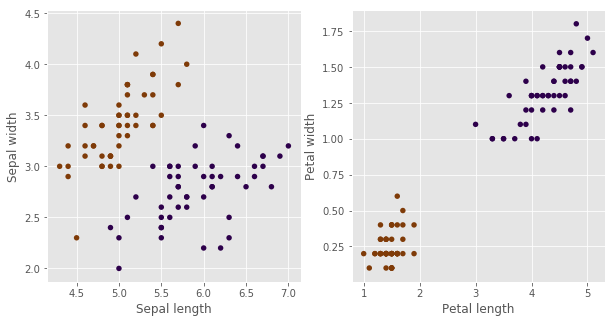

In [315]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

Видно, что классы разделяются, поэтому можно надеяться, что наш алгоритм "найдет" кластеры, соответствующие исходным классам. Результат работы реализованного алгоритма кластеризации предлагается сравнить с эталонной кластеризацией. Для этого предлагается изучить метрику ([adjusted rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)). В случае если значение этой метрики отличается от 1, предлагается поработать над улучшением реализации своего алгоритма.

eps!
4
Adjusted Rand index for iris is: 1.00


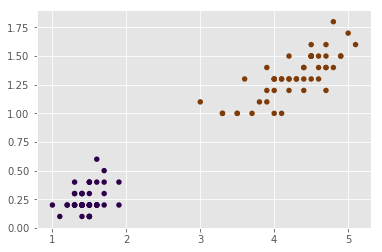

In [336]:
pred_iris = EMClustering(2).fit_predict(x_iris)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=pred_iris, cmap=pl.cm.PuOr, lw=0, s=30)
print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris)

In [341]:
%%timeit -n 1 -r 1
pred_iris = EMClustering(2).fit_predict(x_iris)

eps!
4
1 loop, best of 1: 168 ms per loop


In [143]:
from sklearn.mixture import GaussianMixture

In [342]:
%%timeit -n 1 -r 1
pred_iris = GaussianMixture(n_components=2).fit(x_iris).predict(x_iris)

1 loop, best of 1: 2.82 ms per loop


#### Всего лишь в 60 раз медленнее :) Я не смог придумать, как её ускорить без переписывания на cython.

## Задание 2

Выбрать и реализовать критерий качества, на основании которого будут подбираться параметры модели. Варианты критериев:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Silhouette

**Критерий качества необходимо выбрать таким образом, чтобы он подходил для реализованного алгоритма**

In [145]:
from sklearn.neighbors import DistanceMetric

In [151]:
# Инерция
def quality(X, y, k):
    centroids = np.zeros((k, X.shape[1]));
    cnts = np.zeros((k));
    for i in xrange(X.shape[0]):
        centroids[y[i]] += X[i]
        cnts[y[i]] += 1
    for i in xrange(k):
        if cnts[i] != 0:
            centroids[i] /= cnts[i]
        else:
            centroids[i] = inf
    dist = DistanceMetric.get_metric("euclidean")
    res = dist.pairwise(X, centroids)

    res1 = (res.min(axis = 1)).sum()
    return res1

Применим критерий для выбора параметров алгоритма. Предлагается изменить следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров. На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров.

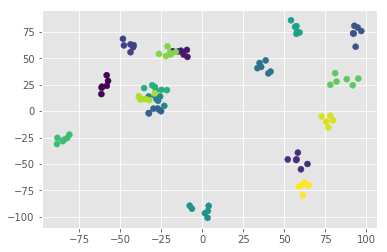

In [333]:
from sklearn.datasets import make_blobs

x, y_t = make_blobs(n_samples=100, n_features=2, centers=17, cluster_std=4, 
           center_box=(-100.0, 100.0), shuffle=False, random_state=1234)
plt.scatter(x[:,0], x[:, 1], c=y_t)

eps!
48


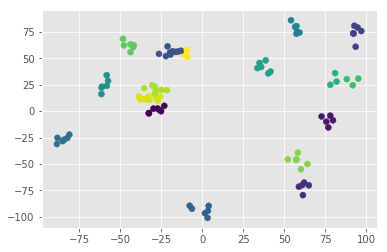

In [337]:
cls = EMClustering(17, maxstep=100)
y = cls.fit_predict(x)
plt.scatter(x[:,0], x[:, 1], c=y)

eps!
3
eps!
3
eps!
3
eps!
3
eps!
4
eps!
13
eps!
49
eps!
15
eps!
16


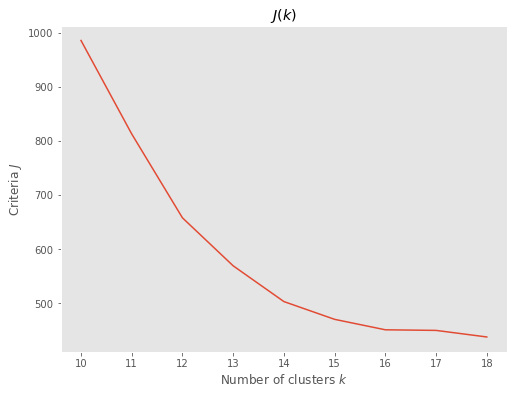

In [338]:
ks = range(10, 19)
criteria = np.zeros(len(ks))

for i, k in enumerate(ks):
    cls = EMClustering(k)
    y = cls.fit_predict(x)
    criteria[i] = quality(x, y, k)
pl.figure(figsize=(8, 6))
pl.plot(ks, criteria)
pl.title("$J(k)$")
pl.ylabel("Criteria $J$")
pl.xlabel("Number of clusters $k$")
pl.grid()
pl.show()

In [343]:
print criteria

[ 985.33518623  812.60796307  657.6382259   568.9864055   502.92151892
  470.08619982  450.78476922  449.66179151  437.51661171]


## Задание 3

Оставим только страны, удалим абсолютные значения там где есть значения в процентах, выберем год, где больше всего известных данных

In [382]:
df = pd.read_csv('WDIData.csv')
df = df[0:-2]
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.831932,83.474617,84.006076,84.416148,84.734574,85.003645,85.244971,NaN,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,85.042248,84.655338,85.955345,86.392313,86.846966,87.604961,88.039125,NaN,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,72.292323,71.765345,73.734266,74.500717,75.218497,76.712250,77.407269,NaN,NaN,NaN


In [411]:
df = df[df["Country Name"] != "Arab World"]
df = df[df["Country Name"] != "Caribbean small states"]
df = df[df["Country Name"] != "Central Europe and the Baltics"]
df = df[df["Country Name"] != "Early-demographic dividend"]
df = df[df["Country Name"] != "East Asia & Pacific"]
df = df[df["Country Name"] != "East Asia & Pacific (excluding high income)"]
df = df[df["Country Name"] != "East Asia & Pacific (IDA & IBRD countries)"]
df = df[df["Country Name"] != "Euro area"]
df = df[df["Country Name"] != "Europe & Central Asia"]
df = df[df["Country Name"] != "Europe & Central Asia (excluding high income)"]
df = df[df["Country Name"] != "Europe & Central Asia (IDA & IBRD countries)"]
df = df[df["Country Name"] != "European Union"]
df = df[df["Country Name"] != "Fragile and conflict affected situations"]
df = df[df["Country Name"] != "Heavily indebted poor countries (HIPC)"]
df = df[df["Country Name"] != "High income"]
df = df[df["Country Name"] != "IBRD only"]
df = df[df["Country Name"] != "IDA & IBRD total"]
df = df[df["Country Name"] != "IDA blend"]
df = df[df["Country Name"] != "IDA only"]
df = df[df["Country Name"] != "IDA total"]
df = df[df["Country Name"] != "Late-demographic dividend"]
df = df[df["Country Name"] != "Latin America & Caribbean"]
df = df[df["Country Name"] != "Latin America & Caribbean (excluding high income)"]

In [430]:
df = df[df["Country Code"] != "TLA"]
df = df[df["Country Name"] != "Least developed countries: UN classification"]
df = df[df["Country Name"] != "Low & middle income"]
df = df[df["Country Name"] != "Low income"]
df = df[df["Country Name"] != "Lower middle income"]
df = df[df["Country Name"] != "Middle East & North Africa"]
df = df[df["Country Code"] != "MNA"]
df = df[df["Country Name"] != "Middle East & North Africa (IDA & IBRD countries)"]
df = df[df["Country Name"] != "Middle income"]
df = df[df["Country Name"] != "North America"]
df = df[df["Country Name"] != "Not classified"]
df = df[df["Country Name"] != "OECD members"]
df = df[df["Country Name"] != "Other small states"]
df = df[df["Country Name"] != "Pacific island small states"]
df = df[df["Country Name"] != "Pre-demographic dividend"]
df = df[df["Country Name"] != "Small states"]

In [438]:
df = df[df["Country Name"] != "South Asia"]
df = df[df["Country Name"] != "South Asia (IDA & IBRD)"]
df = df[df["Country Name"] != "Sub-Saharan Africa"]
df = df[df["Country Name"] != "Sub-Saharan Africa (excluding high income)"]
df = df[df["Country Name"] != "Sub-Saharan Africa (IDA & IBRD countries)"]
df = df[df["Country Name"] != "Upper middle income"]
df = df[df["Country Name"] != "World"]

df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
72991,Afghanistan,AFG,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72992,Afghanistan,AFG,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72993,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,19.774789,19.365638,18.955386,18.544137,18.132025,17.719179,17.305714,NaN,NaN,NaN
72994,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,42.400000,47.888466,42.700000,61.514420,69.100000,75.154373,89.500000,NaN,NaN,NaN
72995,Afghanistan,AFG,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,32.500000,39.877850,32.400000,54.988701,63.800000,70.129379,87.800000,NaN,NaN,NaN


Почему они не сделали для этого отдельную табличку?

In [439]:
m = 0
my = 0
for i in xrange(2016-1960+1):
    year = 1960 + i
    c = df[["Country Name", "Indicator Name", str(year)]].dropna(axis=0).shape[0]
    
    if c > m:
        m = c
        my = year
print my

2010


In [440]:
df2010 = df[["Country Name", "Indicator Name", str(my)]].dropna(axis=0)

In [441]:
dfpivot = df2010.pivot(columns="Indicator Name", values=str(my), index="Country Name")
dfpivot.head()

Indicator Name,ARI treatment (% of children under 5 taken to a health provider),Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Adequacy of social insurance programs (% of total welfare of beneficiary households),Adequacy of social protection and labor programs (% of total welfare of beneficiary households),Adequacy of social safety net programs (% of total welfare of beneficiary households),Adequacy of unemployment benefits and ALMP (% of total welfare of beneficiary households),"Adjusted net enrollment rate, primary (% of primary school age children)",...,Wholesale price index (2010 = 100),"Women participating in the three decisions (own health care, major household purchases, and visiting family) (% of women age 15-49)",Women who believe a husband is justified in beating his wife (any of five reasons) (%),Women who believe a husband is justified in beating his wife when she argues with him (%),Women who believe a husband is justified in beating his wife when she burns the food (%),Women who believe a husband is justified in beating his wife when she goes out without telling him (%),Women who believe a husband is justified in beating his wife when she neglects the children (%),Women who believe a husband is justified in beating his wife when she refuses sex with him (%),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%)
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,18.955386,42.700000,32.400000,82.8,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.642105
Albania,NaN,61.763644,100.000000,100.000000,100.0,NaN,NaN,NaN,NaN,91.033867,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.373536
Algeria,NaN,99.969707,99.711174,98.133492,100.0,NaN,NaN,NaN,NaN,98.660477,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.078491
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,100.000000,100.000000,100.000000,100.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Слишком много NaN нужно отобрать столбцы, где мало NaN и удалить страны которые имеют NaN в этих столбцах

In [442]:
aa = (dfpivot.isnull().sum() < 11)
aa.value_counts()

False    1424
True       38
dtype: int64

In [444]:
dfpivot1 = dfpivot.loc[:, aa]
print dfpivot1.shape
dfpivot1 = dfpivot1.dropna(axis=0)
print dfpivot1.shape
df_dfpivot = pd.DataFrame(dfpivot1)

(217, 38)
(183, 38)


Удалим лишнии абсолютные величины

In [462]:
df_dfpivot.columns

Index([u'Access to electricity (% of population)',
       u'Access to electricity, rural (% of rural population)',
       u'Access to electricity, urban (% of urban population)',
       u'Adjusted savings: mineral depletion (current US$)',
       u'Agricultural land (% of land area)', u'Agricultural land (sq. km)',
       u'Arable land (% of land area)', u'Arable land (hectares per person)',
       u'Arable land (hectares)', u'Birth rate, crude (per 1,000 people)',
       u'Capture fisheries production (metric tons)',
       u'Fixed telephone subscriptions',
       u'Fixed telephone subscriptions (per 100 people)',
       u'Forest area (% of land area)', u'Forest area (sq. km)',
       u'Incidence of tuberculosis (per 100,000 people)',
       u'International migrant stock (% of population)',
       u'International migrant stock, total', u'Land area (sq. km)',
       u'Mobile cellular subscriptions',
       u'Mobile cellular subscriptions (per 100 people)',
       u'Nitrous oxide emissi

In [481]:
to_drop = ["Access to electricity, urban (% of urban population)",
           "Access to electricity, rural (% of rural population)",
           "Agricultural land (sq. km)",
           "Arable land (hectares)",
           "Fixed telephone subscriptions",
           "Capture fisheries production (metric tons)",
           "Forest area (sq. km)",
           "International migrant stock, total",
           "Mobile cellular subscriptions",
           "Rural population",
           "Surface area (sq. km)",
           "Total fisheries production (metric tons)",
           "Urban population",
           "Adjusted savings: mineral depletion (current US$)",
           "Arable land (% of land area)",
           "Arable land (hectares per person)",
           "Nitrous oxide emissions (thousand metric tons of CO2 equivalent)",
           "People practicing open defecation (% of population)",
           "Population, total",
           "Renewable electricity output (% of total electricity output)",
           "Land area (sq. km)"
          ]
df_dfpivot_cleard = df_dfpivot.drop(to_drop, axis=1)
print df_dfpivot_cleard.shape
df_dfpivot_cleard.head()

(183, 17)


Indicator Name,Access to electricity (% of population),Agricultural land (% of land area),"Birth rate, crude (per 1,000 people)",Fixed telephone subscriptions (per 100 people),Forest area (% of land area),"Incidence of tuberculosis (per 100,000 people)",International migrant stock (% of population),Mobile cellular subscriptions (per 100 people),People using basic drinking water services (% of population),People using basic sanitation services (% of population),Population density (people per sq. km of land area),Population growth (annual %),"Primary education, duration (years)",Primary school starting age (years),Rural population (% of total population),Urban population (% of total),Urban population growth (annual %)
Country Name,,,,,,,,,,,,,,,,,
Afghanistan,42.700000,58.067580,39.232,0.058526,2.067825,189.0,0.365658,35.974039,50.046191,33.559192,44.118443,2.812617,6.0,7.0,75.311,24.689,4.347280
Albania,100.000000,43.843066,11.819,10.573044,28.332117,17.0,1.818957,85.468247,88.089492,95.571700,106.314635,-0.496462,5.0,6.0,47.837,52.163,1.609373
Algeria,99.711174,17.371334,24.762,7.885884,0.805294,77.0,0.679773,88.444875,92.388330,86.558847,15.164391,1.821358,5.0,6.0,32.474,67.526,2.869395
Angola,35.132019,46.835646,45.314,1.438029,46.907837,384.0,0.360741,48.101209,40.057690,33.061180,18.744791,3.570099,6.0,6.0,59.903,40.097,5.580344
Antigua and Barbuda,93.961617,20.454545,17.308,41.637912,22.272727,9.2,30.277533,192.553277,97.088704,86.328519,215.138636,1.147472,7.0,5.0,73.761,26.239,-1.037358


In [459]:
import sklearn.preprocessing as pp

In [482]:
ss = pp.StandardScaler()
normalized = ss.fit_transform(df_dfpivot_cleard.values)

27
done
101
done
101
done
101
done
101
done


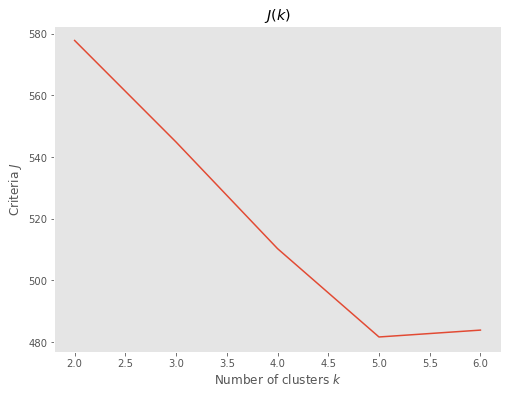

In [483]:
ks = range(2, 7)
criteria = np.zeros(len(ks))

for i, k in enumerate(ks):
    cls = EMClustering(k)
    y = cls.fit_predict(normalized)
    criteria[i] = quality(normalized, y, k)
pl.figure(figsize=(8, 6))
pl.plot(ks, criteria)
pl.title("$J(k)$")
pl.ylabel("Criteria $J$")
pl.xlabel("Number of clusters $k$")
pl.grid()
pl.show()

Из картинки видно, что по методу локтя страны следует разбивать на 5 кластеров

In [485]:
N = 5
cls = EMClustering(N, maxstep=300)
y = cls.fit_predict(normalized)
print y

301
done
[1 3 3 1 4 2 4 4 2 2 4 0 3 4 2 4 3 1 4 3 3 2 1 2 4 2 1 1 3 1 1 4 4 1 1 4 3
 2 1 1 1 4 1 2 4 4 2 4 0 3 2 3 3 1 2 1 3 2 4 3 1 2 2 1 4 3 1 1 3 1 3 2 4 3
 3 4 3 4 4 2 3 4 0 2 1 1 4 0 2 3 2 4 1 1 4 2 2 1 1 4 3 1 4 1 4 2 3 2 3 2 3
 1 1 1 3 4 4 4 3 1 1 4 0 3 4 3 1 2 3 3 2 4 4 0 2 2 1 3 1 4 1 2 3 1 0 2 4 1
 1 1 4 3 3 3 1 3 1 2 4 2 2 1 3 1 1 3 3 2 2 2 1 2 0 4 4 4 2 1 2 3 1 1 1]


In [486]:
cntrs = dfpivot1.index.tolist()
lst = [[],[],[],[],[]]
for i in xrange(len(y)):
    lst[y[i]].append(cntrs[i])
print lst

[['Bahrain', 'Djibouti', 'Jordan', 'Kuwait', 'Oman', 'Qatar', 'Singapore', 'United Arab Emirates'], ['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Eritrea', 'Ethiopia', 'Gambia, The', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Kenya', 'Kiribati', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Myanmar', 'Namibia', 'Niger', 'Nigeria', 'Papua New Guinea', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Sierra Leone', 'Solomon Islands', 'Somalia', 'South Africa', 'Sudan', 'Swaziland', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Vanuatu', 'Yemen, Rep.', 'Zambia', 'Zimbabwe'], ['Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Colombia', 'Croatia', 'Czech Republic', 'Ecuador', 'Estonia', 'Finland', 'Georgia', 'Germany', 'Hungary', 'Italy', 'Kazakhstan', 'Kyrg

In [487]:
nn = ss.inverse_transform(normalized)
centroids = np.zeros((N, nn.shape[1]));
cnts = np.zeros((N));
for i in xrange(nn.shape[0]):
    centroids[y[i]] += nn[i]
    cnts[y[i]] += 1
for i in xrange(N):
    if cnts[i] != 0:
        centroids[i] /= cnts[i]
    else:
        centroids[i] = inf
centroids = pd.DataFrame(centroids, columns=df_dfpivot_cleard.columns)

In [488]:
centroids.to_excel("clustering.xlsx")

In [489]:
from sklearn import manifold

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 183 samples in 0.001s...
[t-SNE] Computed neighbors for 183 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 183 / 183
[t-SNE] Mean sigma: 1.704884
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.062824
[t-SNE] Error after 800 iterations: 0.429277


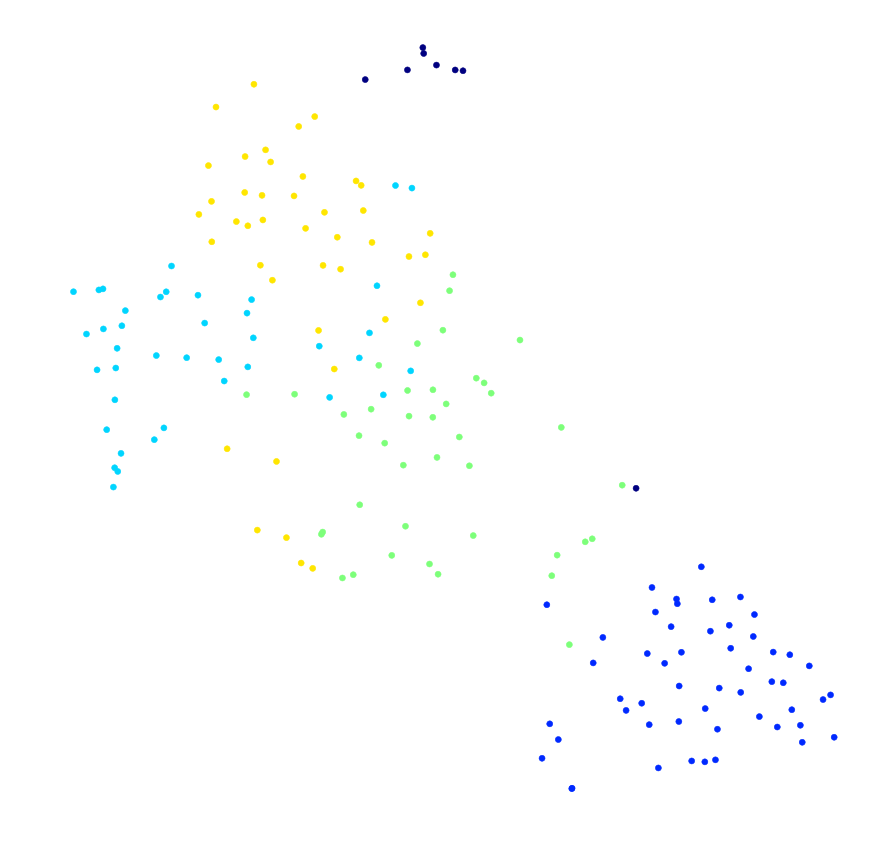

In [490]:
tsne = manifold.TSNE(n_components=2, verbose=1, n_iter=1000)
z = tsne.fit_transform(normalized)
cm = pl.get_cmap('jet')
pl.figure(figsize=(15, 15))
pl.scatter(z[:, 0], z[:, 1], c=map(lambda c: cm(1.0 * c / k), y))
pl.axis('off')
pl.show()

## Задание 4

1. Очень богатые, урбанизированные страны с огромной плотностью населения и огромным потоком мигрантов
2. Бедные сельскохозяйственные страны, 
3. Страны среднего достатка с хорошо развитым сельским хозяйством и медициной и средней плотностью населения
4. Страны среднего достатка с плохо развитыми городами и медициной и высокой плотностью населения
5. Богатые страны с большим количеством мигрантов и высокой плотностью населения. Большее количество людей живут в городах

Поздравляем, Вы завершили домашние задания по модулю "Алгоритмы кластеризации". Надеемся, что это было интересно.